I'm going to use the dataset California_Housing in sklearn to predict the house price on the basis of the feature values.The main mechine learning method I plan to use is linear regression.

In [76]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [77]:
from sklearn.datasets import fetch_california_housing

In [78]:
df=fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n 

In [79]:
x =df.data

In [80]:
X = pd.DataFrame(df.data,columns=df.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [81]:
y = df.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [82]:
print(x[:0])

[]


In [83]:
r1 = np.corrcoef(x[:0], y)
print(r1)

[]


Then I will draw some plots to show the relationship between the house price and some features.

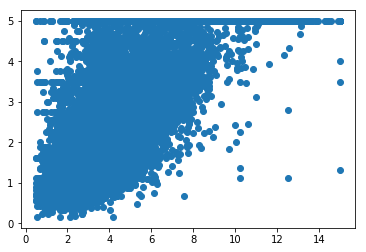

In [32]:
plt.scatter(x[:,0], y)
plt.show()

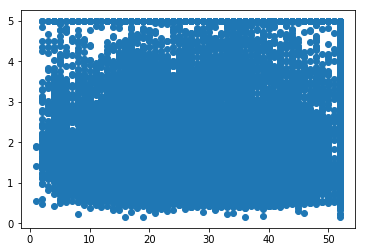

In [39]:
plt.scatter(x[:,1], y)
plt.show()

Column 0 represents the feature 'MedInc'and Column1 represents the feature 'HouseAge'.It seems that 'MedInc' is positively related to y, but there is no clear relationship between 'HouseAge'and y.

Now I'm going to use linear regression,a supervised learning method,to make predictions.

I'll firstly standardize the data to better train the model.

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)
X_std

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

Then I'll split my features and target data into training and test sets.

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2,random_state=420)

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model.coef_

array([ 0.82943076,  0.12507696, -0.27591729,  0.31140146, -0.00134477,
       -0.03642907, -0.88826987, -0.85855162])

Then I'll use MSE to evalute the model on the test data.

In [47]:
from sklearn.metrics import mean_squared_error
y_test_pred = model.predict(X_test)
mean_squared_error(y_test,y_test_pred)

0.5202857882372675

R^2 is also an important estimate.

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred) 

0.6070519584922167

I'll also use cross validation method to evaluate the model. 

In [49]:
model = LinearRegression()
cross_val_score(model,X_test,y_test,cv=10,scoring='r2')

array([0.61541534, 0.57378915, 0.61022451, 0.64313914, 0.01106929,
       0.66294731, 0.52628253, 0.60762721, 0.59758883, 0.63579251])

In [50]:
cross_val_score(model,X_test,y_test,cv=10,scoring='r2').mean()

0.5483875826416659

The MSE and cross_val_score represent the error rate of predition.The smaller they are, the better this model is. They are now both higher than 0.5, which is not ideal results.

R^2 represents the interpretbility of this model and the value here is slightly larger than 0.6, which is not very high. The model still need to be improved.